
## Mini PJT

- `California Housing` 데이터셋을 이용하여 선형회귀 문제를 풀어봅니다.

(Source : https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)


- 단순 선형회귀를 통해 각 Feature들을 이용하여 집값을 예측해봅니다.


- 20640개의 row, 8개의 column으로 구성되어 있습니다.


- 각 feature별 영향력을 알아보고, 테스트 해봅니다.

### 1. 데이터 및 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.simplefilter('ignore')

In [2]:
# California 데이터 불러오기
from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame=True)['data']
y = fetch_california_housing(as_frame=True)['target']

display(X)
display(y)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [3]:
data = pd.concat([X,y], axis=1)
display(data)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. Data Preprocessing

1. 결측치 확인

2. feature selection

In [4]:
# 결측치를 확인합니다.
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
data.info()

## 숫자형 데이터임에도 불구하고 dtype이 object인 경우에는 중간에 '-', ' '
## 등의 값이 포함되어 있을 수 있다.

## 하지만 해당 데이터의 경우 모든 column의 dtype이 float64이기 때문에
## 공백과 같은 결측치는 없음을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# 필요없는 column을 제거합니다.
## 직관적으로 선택할 수도 있고, EDA이 후 제거해도 된다.

### 내가 직관적으로 생각했을때 모든 column이 유의미하다 생각하기 때문에
#### column제거 없이 진행해보도록 하자.

### 3. EDA

- feature distribution

- target distribution



In [7]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<AxesSubplot:xlabel='MedInc', ylabel='Count'>

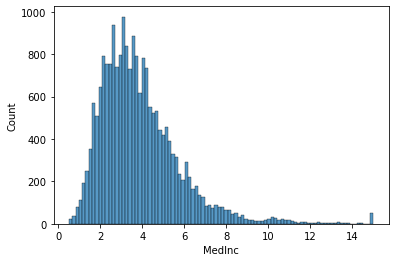

In [8]:
# feature distribution

sns.histplot(data=data, x='MedInc')

## 상한선을 걸어놓고 그 이상의 데이터를 치환하는 경우 다음과 같이 나타날 수 있다.

### clipping

<AxesSubplot:ylabel='Density'>

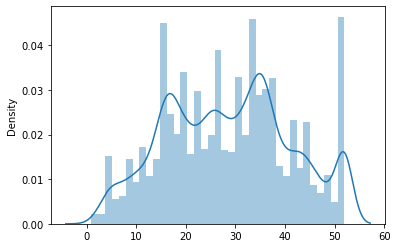

In [9]:
## houseage

sns.distplot(x=data['HouseAge'])

'Max Rooms : 141.9090909090909'

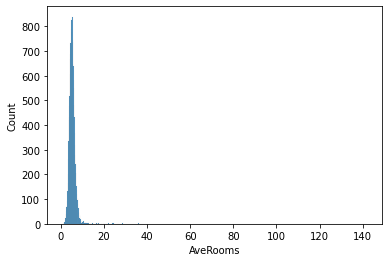

In [10]:
## average rooms

sns.histplot(data=data, x='AveRooms')

display(f"Max Rooms : {max(data['AveRooms'])}") ## 충분히 있을 수 있지만 신기하다.

'Max Bed Rooms : 34.06666666666667'

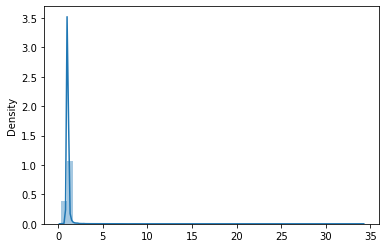

In [11]:
## average bedroom

sns.distplot(x=data['AveBedrms'])
display(f"Max Bed Rooms : {max(data['AveBedrms'])}") 

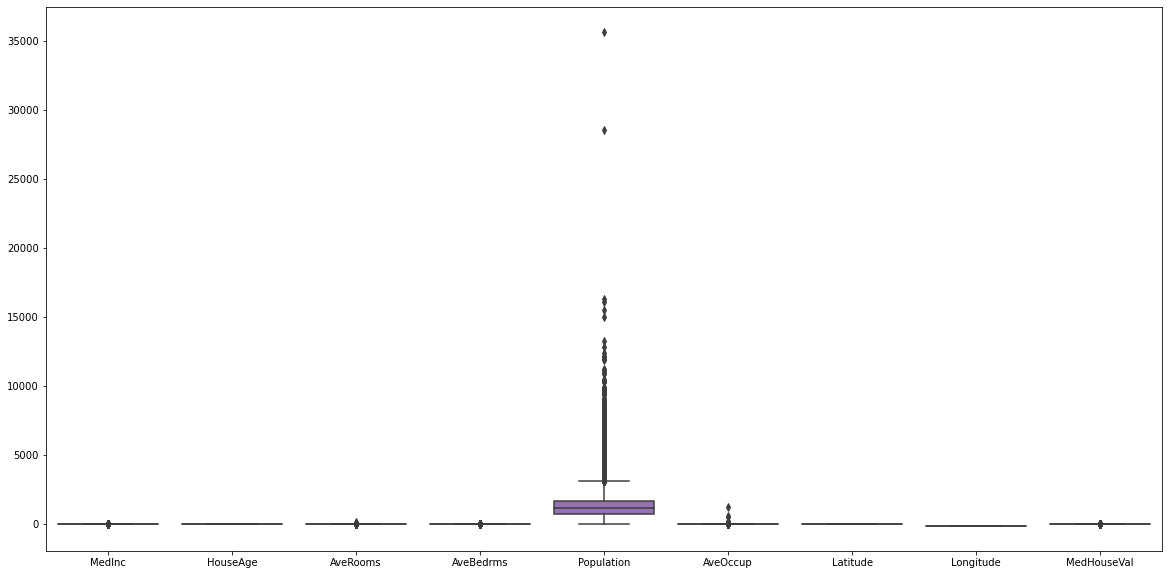

In [12]:
## 위와같은 데이터 분포를 보일때는 boxplot을 통해 확인을 해보자.

### Boxplot의 경우 우선 전체 데이터에 대해 관측하고 그 이후 세부적으로 들어가 관측하자.
f, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(data=data)
plt.show()

### population의 경우 이상이가 있을 수 있겠다라는 생각이 든다.
## population의 경우 단위가 너무 커서 다른 column들을 제대로 관측하기 
### 힘들기 때문에 이번에는 population을 제외하고 관측해보자.

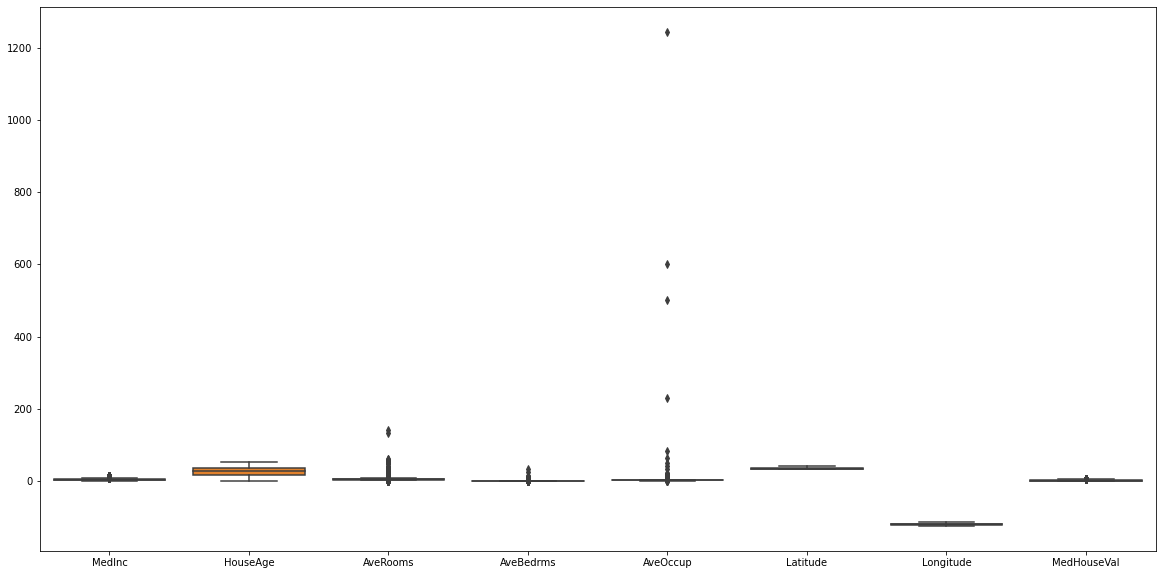

In [13]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(data=data.drop('Population', axis=1))
plt.show()

## AveRooms, AveBedrms, AveOccup의 값만 따로 관측해보자.(나머지 컬럼은 특이한 점을 발견하지 못했다.)

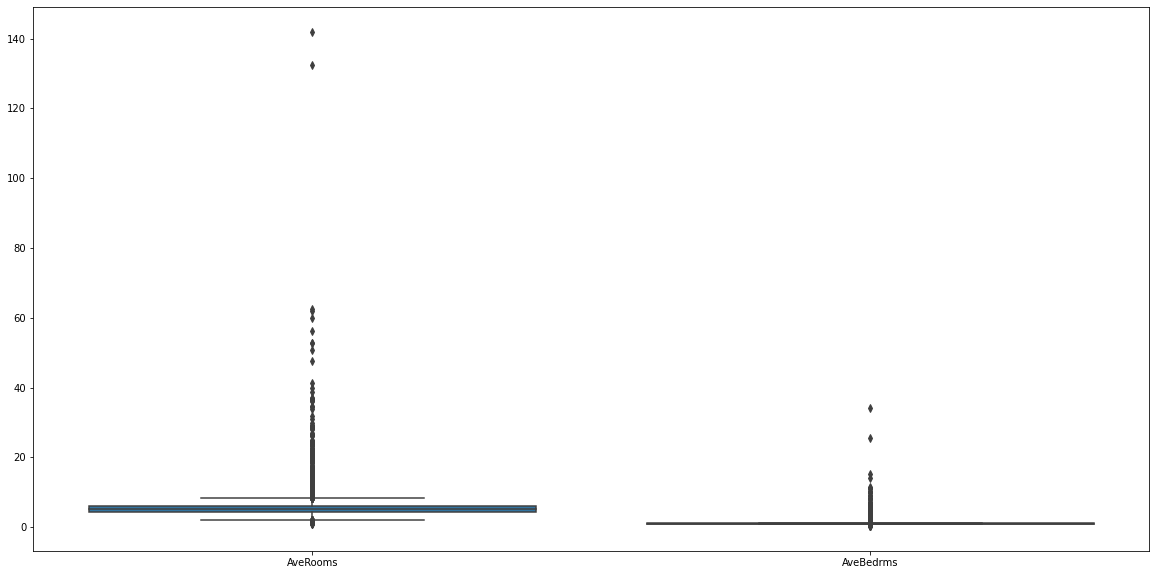

In [14]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(data=data[['AveRooms', 'AveBedrms']])
plt.show()

## 둘다 outlier가 많이 관측되지만 모두 처리를 해주기에는 데이터의 양이 많아 보인다. 하지만 가장 많이 떨어진 2개 정도는 
### 어떻게 처리할 것인지 고민을 해 볼 수 있다.

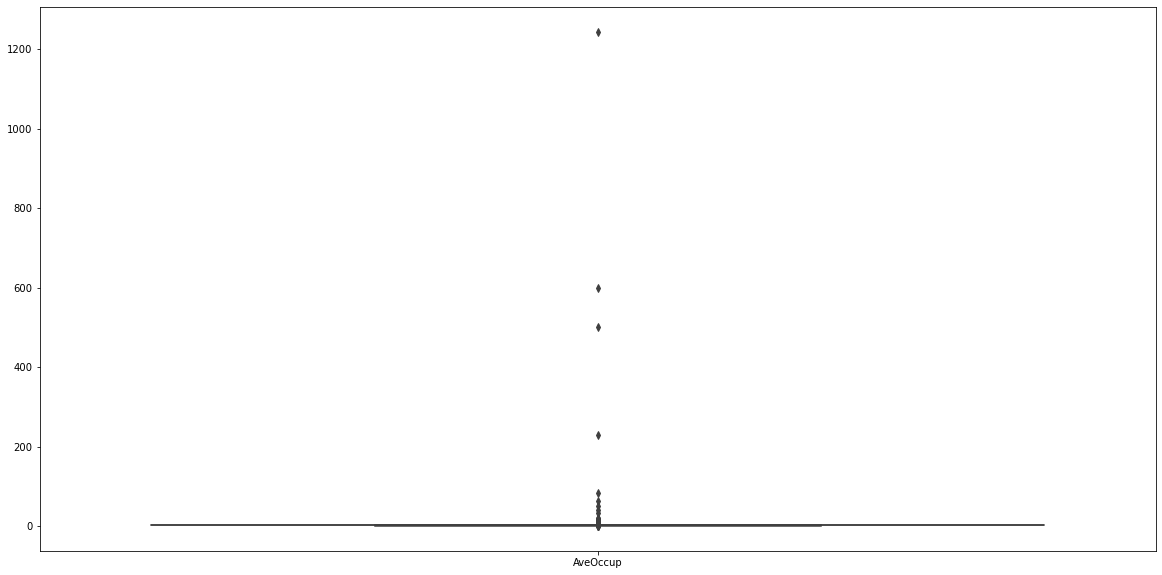

In [15]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(data=data[['AveOccup']])
plt.show()

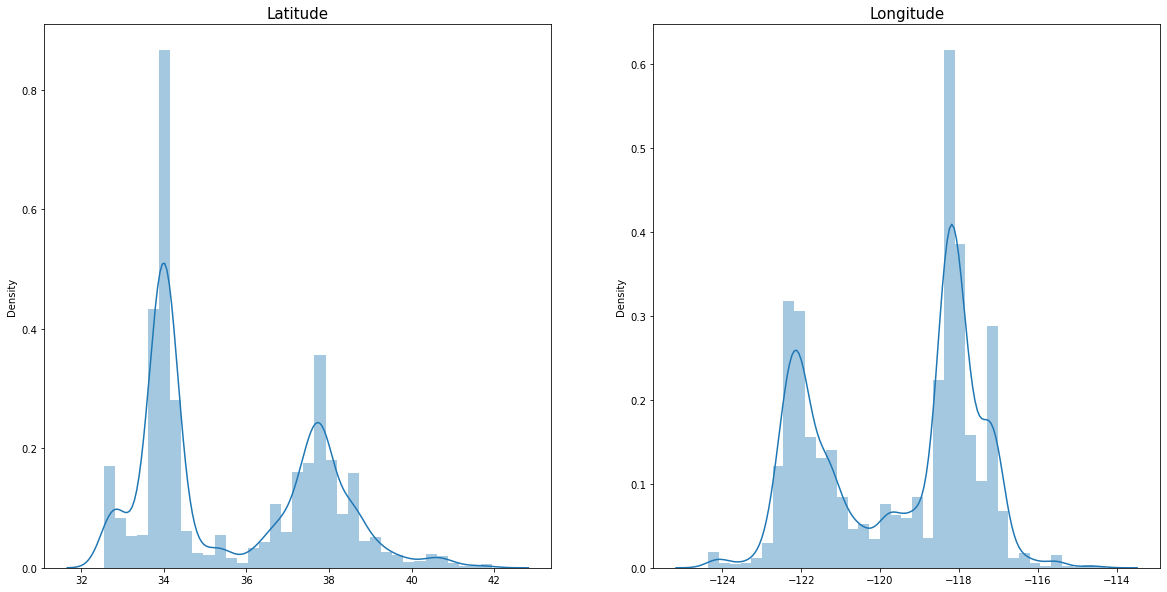

In [16]:
## longitude, latitude

f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.distplot(x=data['Latitude'], ax=ax[0])
ax[0].set_title('Latitude', fontsize=15)

sns.distplot(x=data['Longitude'], ax=ax[1])
ax[1].set_title('Longitude', fontsize=15)

plt.show()

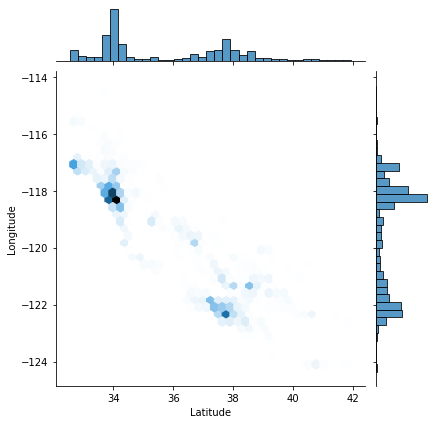

In [17]:
sns.jointplot(data=data, x='Latitude', y='Longitude', kind='hex')

<AxesSubplot:ylabel='Density'>

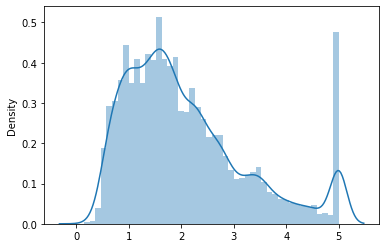

In [18]:
## target value_distribution

sns.distplot(x=data['MedHouseVal'])

## target value에서도 clipping이 관측됨.(상한선 존재, 그 이상의 값은 최대값으로 치환)

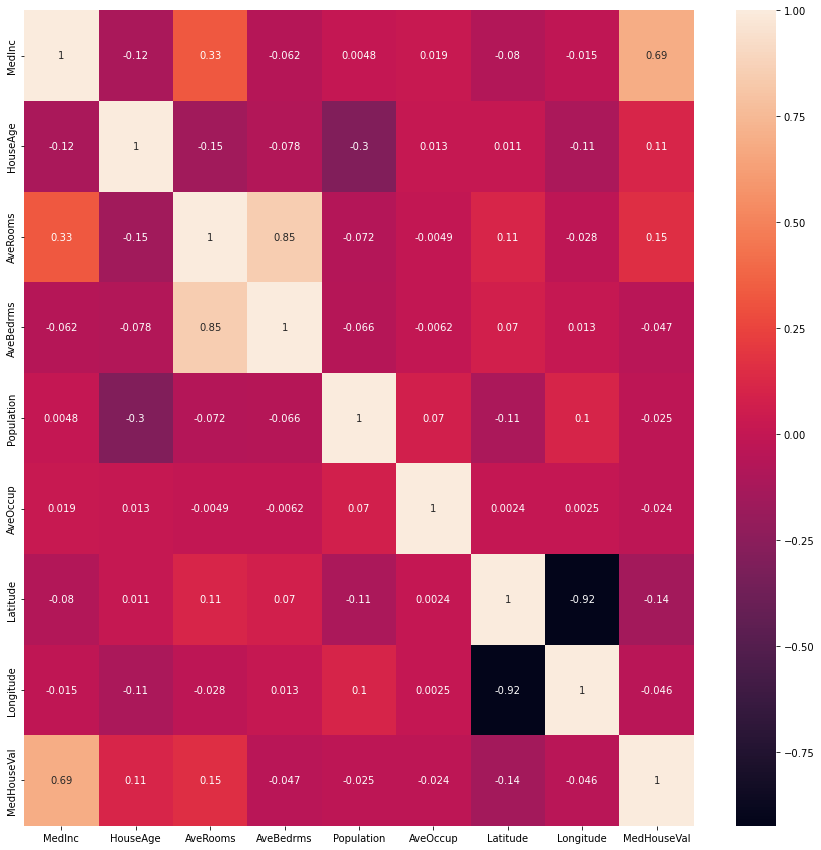

In [19]:
## heatmap을 통해 correlation을 관측하는것도 좋은 방법이다.
f, ax = plt.subplots(1, 1, figsize = (15, 15))
sns.heatmap(data.corr(), annot=True)
plt.show()

## MedInc - MedHouseVal(target): 0.69 - 높은 상관관계를 가진다.

## MedInc - AveRooms: 0.33 - 어느정도 상관관계가 있다.

## AveRooms - AveBedrms: 0.85 - 아주 높은 수치(거의 동일한 지표) - 모델링시 둘 중 하나만 사용해준다.

## Longitude - Latitude: -0.92 - 서로 방향만 반대이고 거의 동일한 지표 - 모델링시 둘 중 하나만 사용해준다.

## HouseAge - Population: -0.3 - 어느정도 상관관계 (오래 될수록 population이 적다.)

---

### 이상치에 대한 처리

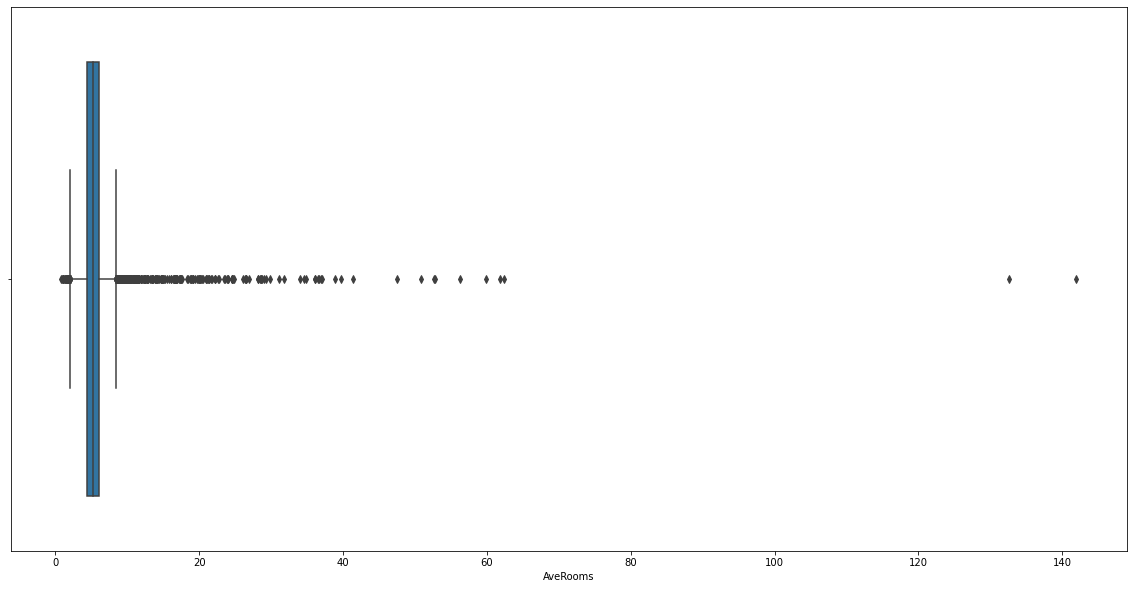

In [20]:
f, ax = plt.subplots(1, 1, figsize = (20, 10))

sns.boxplot(data=data, x='AveRooms')

plt.show()

In [21]:
data[data['AveRooms'] > 100] # 1914, 1979
## extreme한 case 2개만 제거해준다.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


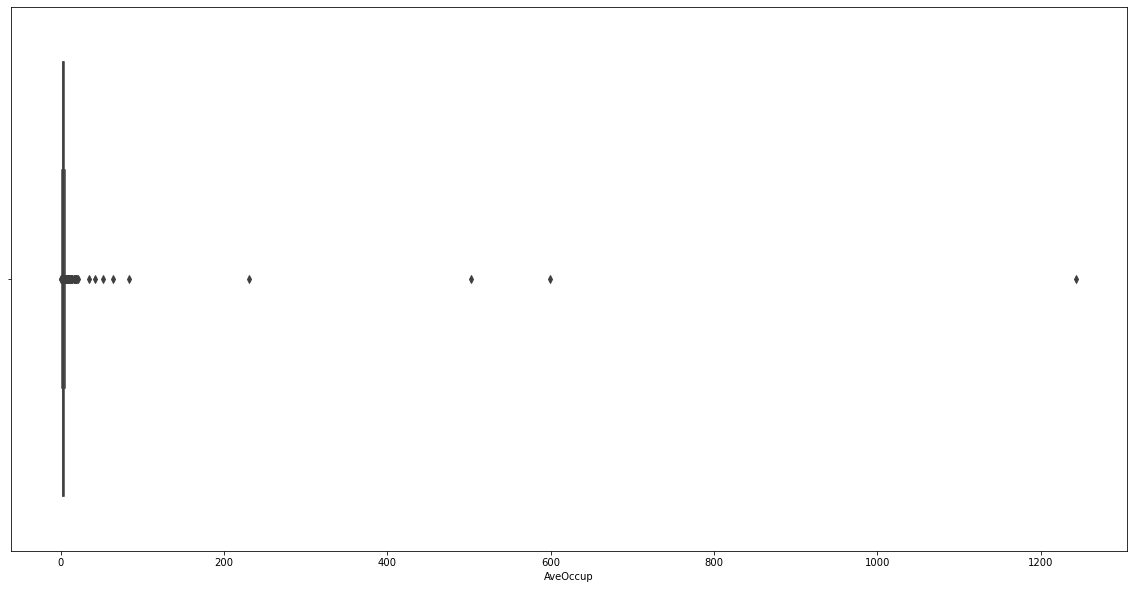

In [22]:
f, ax = plt.subplots(1, 1, figsize = (20, 10))

sns.boxplot(data=data, x='AveOccup')

plt.show()

In [23]:
data[data['AveOccup'] > 200] # 3364, 13034, 16669, 19006 row 제거

del_lst = list(data[(data['AveOccup'] > 200) | (data['AveRooms'] > 100)].index)

In [24]:
## 컬럼 제거 (AveBedrms, Longitude)

data = data.drop(['AveBedrms', 'Longitude'], axis=1)

In [25]:
## 이상치가 포함된 행 제거

data = data.drop(index=del_lst)

In [26]:
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


---

In [27]:
# target distribution
X
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

### 4. Training

- train-test split

- Standardization

- Model training

- Hyper-parameter tuning

- Evaluation

In [28]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

# print(X_train.shape, X_test.shape)

In [29]:
X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, test_size=0.25, random_state=0xC0FFE)


X_train.shape, X_val.shape, X_test.shape

((12384, 8), (4128, 8), (4128, 8))

In [30]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
6516,2.9334,22.0,4.334478,1.079670,6666.0,4.578297,34.07,-118.01
6570,5.4727,34.0,6.312785,1.175799,1422.0,3.246575,34.21,-118.15
13904,1.9779,15.0,5.791494,1.191909,2709.0,2.810166,34.15,-116.39
18031,6.3663,26.0,6.387370,0.990575,3319.0,3.128181,37.24,-121.92
14436,2.1357,28.0,3.339564,1.031153,692.0,2.155763,32.80,-117.24
...,...,...,...,...,...,...,...,...
6318,3.7083,33.0,5.797688,1.101156,1410.0,4.075145,34.01,-117.97
5844,3.1051,23.0,3.731289,1.031705,4757.0,2.472453,34.20,-118.33
4657,1.5882,50.0,4.599338,1.205298,976.0,3.231788,34.05,-118.32
16625,2.5552,34.0,5.075851,1.105263,1397.0,2.162539,35.37,-120.84


In [31]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [32]:
!pip install xgboost

In [33]:
# 학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso # 2. Lasso
from sklearn.linear_model import Ridge # 3. Ridge
from xgboost.sklearn import XGBRegressor # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor# 5. LightGBM

from sklearn.metrics import mean_squared_error

In [34]:
## training

reg_1 = LinearRegression()
reg_2 = Lasso()
reg_3 = Ridge()
reg_4 = XGBRegressor()
# reg_5 = LGBMRegressor()

# reg_1.fit(X_train, y_train)
# reg_2.fit(X_train, y_train)
# reg_3.fit(X_train, y_train)
# reg_4.fit(X_train, y_train)
# reg_5.fit(X_train, y_train)


# pred_train_1 = reg_1.predict(X_train)
# pred_train_2 = reg_2.predict(X_train)
# pred_train_3 = reg_3.predict(X_train)
# pred_train_4 = reg_4.predict(X_train)
# pred_train_5 = reg_5.predict(X_train)

# pred_val_1 = reg_1.predict(X_val)
# pred_val_2 = reg_2.predict(X_val)
# pred_val_3 = reg_3.predict(X_val)
# pred_val_4 = reg_4.predict(X_val)
# pred_val_5 = reg_5.predict(X_val)

# mse_train_1 = mean_squared_error(y_train, pred_train_1)
# mse_val_1 = mean_squared_error(y_val, pred_val_1)
# mse_train_2 = mean_squared_error(y_train, pred_train_2)
# mse_val_2 = mean_squared_error(y_val, pred_val_2)
# mse_train_3 = mean_squared_error(y_train, pred_train_3)
# mse_val_3 = mean_squared_error(y_val, pred_val_3)
# mse_train_4 = mean_squared_error(y_train, pred_train_4)
# mse_val_4 = mean_squared_error(y_val, pred_val_4)
# mse_train_5 = mean_squared_error(y_train, pred_train_5)
# mse_val_5 = mean_squared_error(y_val, pred_val_5)

# print('1. Linear Regression, train/val = %.4f, %.4f' % (mse_train_1, mse_val_1))
# print('2. Lasso, train/val = %.4f, %.4f' % (mse_train_2, mse_val_2))
# print('3. Ridge, train/val = %.4f, %.4f' % (mse_train_3, mse_val_3))
# print('4. XGBoost, train/val = %.4f, %.4f' % (mse_train_4, mse_val_4))
# print('5. LightGBM, train/val = %.4f, %.4f' % (mse_train_5, mse_val_5))

In [35]:
# Hyper-parameter tuning

# GridSearchCV

### 5. Test(Prediction)

In [36]:
# training set과 같은 전처리!
result_1 = reg_1.predict(X_test)
result_2 = reg_2.predict(X_test)
result_3 = reg_3.predict(X_test)
result_4 = reg_4.predict(X_test)
result_5 = reg_5.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# prediction!


In [ ]:
# Summary!
print("---------- Linear Regression ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result))

print("---------- Lasso ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result2))

print("---------- Ridge ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))

print("---------- XGBoost ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))

print("---------- LightGBM ---------")
print('MSE in training: %.4f' % mean_squared_error(y_test, result3))